In [1]:
#Importing the necessary modules
import numpy as np 
import tensorflow as tf 
from keras import layers, models

# Importing the MNIST dataset
from keras.datasets import mnist

from keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import matplotlib as mt 

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
# Building a convolutional neural network (CNN) 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# Training and evaluating the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
predictions = model.predict(test_images)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
750/750 [==============================] - 20s 24ms/step - loss: 0.2160 - accuracy: 0.9345 - val_loss: 0.0809 - val_accuracy: 0.9761
Epoch 2/5
750/750 [==============================] - 28s 37ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 3/5
750/750 [==============================] - 70s 94ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0458 - val_accuracy: 0.9862
Epoch 4/5
750/750 [==============================] - 49s 66ms/step - loss: 0.0341 - accuracy: 0.9887 - val_loss: 0.0413 - val_accuracy: 0.9882
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0361 - accuracy: 0.9881


In [6]:
# Converting predictions into categorical data
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels, axis=1)

In [7]:
# Displaying classification report and accuracy
print('Classification Report:')
print(classification_report(true_labels, predicted_labels))
print(f'Test accuracy: {int(test_acc*100)}%')

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test accuracy: 98%


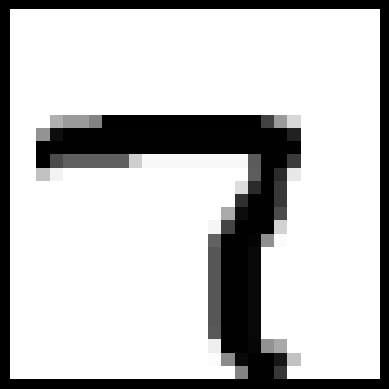

In [8]:
num = int(input('Enter a number between 1 and 70000: '))
some_digit = train_images[num]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mt.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()